## Model Selection: K-NN Classification

In [1]:
# Adding Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time

In [2]:
# Read in data from the file
df = pd.read_csv('heart.csv')
df.head() # show the first five values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Output is the 'target' column. The goal is to identify whether a patient has heart disease or not.

In [3]:
df_not = df[df['target']==1]
df_yes = df[df['target']==0]
df_yes.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


We select maximum heart rate and ST Depression as our first set of independent variables.

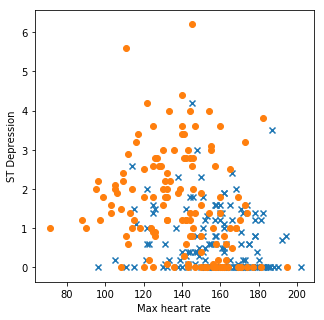

In [4]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df_not['thalach'],df_not['oldpeak'],marker='x')
ax.scatter(df_yes['thalach'],df_yes['oldpeak'],marker='o')
ax.set(xlabel='Max heart rate', ylabel='ST Depression')
plt.show()

In [5]:
# Loading Libraries required for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# we let k = 5 first, which means choosing 5 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors = 5) 

In [6]:
X= df.loc[:,['thalach','oldpeak']]
y = df.loc[:,'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,thalach,oldpeak
287,164,0.0
282,134,2.2
197,163,0.2
158,144,0.4
164,173,0.0


In [7]:
knn_model = KNeighborsClassifier(n_neighbors = 5) 
start = time.time()

knn_model.fit(X_train, y_train)
end = time.time()
print(end-start)

0.0019936561584472656


In [8]:
y_pred = knn_model.predict(X_test)
print(y_pred) # our prediction
print(y_test) # actual values

[0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 0 1]
179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
5      1
101    1
45     1
175    0
118    1
46     1
125    1
192    0
285    0
279    0
152    1
269    0
272    0
25     1
146    1
283    0
254    0
73     1
231    0
109    1
      ..
281    0
78     1
292    0
232    0
219    0
255    0
63     1
82     1
236    0
204    0
249    0
104    1
300    0
193    0
184    0
132    1
202    0
196    0
75     1
176    0
59     1
93     1
6      1
177    0
30     1
22     1
258    0
56     1
242    0
114    1
Name: target, Length: 76, dtype: int64


In [9]:
# we should test how accurate our model is 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6578947368421053


### Explore more about model

We can try use different k values for our model and check its accuracy.<br>

We will try k = 1 to k =20, as smaller k means noises have large influence and larger k means computation becomes expensive. 

In [10]:
k_array = np.arange(1, 21, 2)

k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [11]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    print(k)
    print(ac)

1
0.6578947368421053
3
0.7236842105263158
5
0.6578947368421053
7
0.6973684210526315
9
0.7105263157894737
11
0.7236842105263158
13
0.7368421052631579
15
0.7236842105263158
17
0.7236842105263158
19
0.7631578947368421


In [12]:
knn_1 = KNeighborsClassifier(n_neighbors = 19)
knn_1.fit(X_train, y_train)
y_pred1 = knn_1.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.7631578947368421


The accuracy of the model using different values of k varies. Choosing a optimized value for our model is important.

Next, we added chest pain and exercise induced angina to our first set of independent variables (maximum heart rate and ST Depression).

In [13]:
x= df.loc[:,['cp','exang','thal','oldpeak']]
y = df.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 42)

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 15) 
start = time.time()

knn_model.fit(X_train, y_train)
end = time.time()
print(end-start)

0.002956867218017578


In [15]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [16]:
k_array = np.arange(1, 30, 2)
    
# we can change k value to 1 - 30, and check the accuracy score
# Then we can choose the optimized k value

for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    print(k)
    print(ac)

1
0.7763157894736842
3
0.7236842105263158
5
0.75
7
0.7763157894736842
9
0.8552631578947368
11
0.8552631578947368
13
0.8552631578947368
15
0.868421052631579
17
0.868421052631579
19
0.868421052631579
21
0.868421052631579
23
0.868421052631579
25
0.8552631578947368
27
0.8552631578947368
29
0.868421052631579


In [17]:
knn_1 = KNeighborsClassifier(n_neighbors = 15)
knn_1.fit(X_train, y_train)
y_pred1 = knn_1.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.868421052631579


Validation with Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  6],
       [ 4, 37]], dtype=int64)

In [19]:
# The confusion matrix when k = 1
confusion_matrix(y_test, y_pred1)

array([[29,  6],
       [ 4, 37]], dtype=int64)

In [20]:
# The F1 score can be interpreted as a weighted average of the precision and recall, 
# where an F1 score reaches its best value at 1 and worst score at 0.
from sklearn.metrics import f1_score
f1_score(y_test, y_pred1, average = 'micro')

0.868421052631579

### Conclusion

With an increase in independent variables from 2 to 4, we have improved accuracy score from 76.3% to 86.8%. However, training duration has increased slightly by 0.001 second as the dataset is quite large (303 rows of data) and it is taxing on computing recources to use K-NN model. 